In [22]:
from sympy import *
from dtumathtools import *
#from august import *
init_printing()

x, y, z, a, b, c = symbols('x y z a b c')
k, w = symbols('k w', real=True)
f, m, t, delta = symbols('f m t delta', real=True, positive=True)
xi = symbols('xi', real=True)
k_s = symbols('k_s', real=True, positive=True)

https://www.youtube.com/watch?v=FQgG9tPZ-I4&t=2111s
https://www.youtube.com/watch?v=cD41LXKSyVU&list=PLOr3fZwA0ZzIIXOFcY5t6Zk1PxhhzTrvX&index=10

In [23]:
k1, k2, kc, kb2, l1, l2, lg, it = symbols('k_1 k_2 k_c k_{b2} l_1 l_2 l_g I_t', real=True, positive=True)
m2, mr, g, u, w, t, phiu = symbols('m_2 m_r g u omega t phi_u', real=True, positive=True)
ffhm = symbols('F_FHM')
kk3 = l2**(-2)*(kc+l1**2*k1-lg*mr*g)

y1, y2 = Function('y_1')(t), Function('y_2')(t)
z1, z2 = Function('z_1')(t), Function('z_2')(t)

M = Matrix([[l2**(-2)*it, 0], [0, m2]])
K = Matrix([[k2+l2**(-2)*(kc+l1**2*k1-lg*mr*g), -k2], [-k2, k2+kb2]])
ft = Matrix([l2**(-1)*u*w**2*sin(w*t+phiu), 0])
yt = Matrix([y1, y2])
zt = Matrix([z1, z2])

M, K, ft, yt, zt

⎛⎡ Iₜ    ⎤  ⎡                      2                   ⎤  ⎡ 2                ⎤
⎜⎢───  0 ⎥  ⎢     -g⋅l_g⋅mᵣ + k₁⋅l₁  + k_c             ⎥  ⎢ω ⋅u⋅sin(ω⋅t + φᵤ)⎥
⎜⎢  2    ⎥  ⎢k₂ + ────────────────────────      -k₂    ⎥  ⎢──────────────────⎥
⎜⎢l₂     ⎥, ⎢                 2                        ⎥, ⎢        l₂        ⎥
⎜⎢       ⎥  ⎢               l₂                         ⎥  ⎢                  ⎥
⎜⎣ 0   m₂⎦  ⎢                                          ⎥  ⎣        0         ⎦
⎝           ⎣             -k₂               k₂ + k_{b2}⎦                      

                  ⎞
                  ⎟
  ⎡y₁(t)⎤  ⎡z₁(t)⎤⎟
, ⎢     ⎥, ⎢     ⎥⎟
  ⎣y₂(t)⎦  ⎣z₂(t)⎦⎟
                  ⎟
                  ⎠

In [24]:
k2 = symbols('k_2', real=True)
k3, k4, k5 = symbols('k_3 k_4 k_5')
f1, f2 = symbols('f_1 f_2', real=True)
K = Matrix([[k2 + k3, -k2], [-k2, k2 + k4]])
FFHM = Matrix([[0, 0],[0, k5]])
f = Matrix([f1, f2])
f_til = Matrix([l2**(-1)*u*w**2*(sin(phiu)-I*cos(phiu)), 0])
K_til = K + FFHM
f_til, K_til

⎛⎡ 2                        ⎤                         ⎞
⎜⎢ω ⋅u⋅(sin(φᵤ) - ⅈ⋅cos(φᵤ))⎥                         ⎟
⎜⎢──────────────────────────⎥  ⎡k₂ + k₃      -k₂     ⎤⎟
⎜⎢            l₂            ⎥, ⎢                     ⎥⎟
⎜⎢                          ⎥  ⎣  -k₂    k₂ + k₄ + k₅⎦⎟
⎝⎣            0             ⎦                         ⎠

In [25]:
diff_eq = Eq(Add(MatMul(M,yt), MatMul(K_til,yt), evaluate=False), f_til)
diff_eq

⎡ Iₜ    ⎤                                             ⎡ 2                     
⎢───  0 ⎥                                             ⎢ω ⋅u⋅(sin(φᵤ) - ⅈ⋅cos(φ
⎢  2    ⎥ ⎡y₁(t)⎤   ⎡k₂ + k₃      -k₂     ⎤ ⎡y₁(t)⎤   ⎢───────────────────────
⎢l₂     ⎥⋅⎢     ⎥ + ⎢                     ⎥⋅⎢     ⎥ = ⎢            l₂         
⎢       ⎥ ⎣y₂(t)⎦   ⎣  -k₂    k₂ + k₄ + k₅⎦ ⎣y₂(t)⎦   ⎢                       
⎣ 0   m₂⎦                                             ⎣            0          

   ⎤
ᵤ))⎥
───⎥
   ⎥
   ⎥
   ⎦

In [26]:
eta, ks, Fs0, hp, cs = symbols('eta k_s F_{0s} h_p c_s', real=True, positive=True)
kk = ks*(1 + eta*I) + Fs0 / hp * (1 + cs)
kk

In [27]:
diff_eq.subs({k3: kk3, k4: kb2, k5: Mul(2,kk, evaluate=False)})

                    ⎡                      2                                  
⎡ Iₜ    ⎤           ⎢     -g⋅l_g⋅mᵣ + k₁⋅l₁  + k_c                            
⎢───  0 ⎥           ⎢k₂ + ────────────────────────                        -k₂ 
⎢  2    ⎥ ⎡y₁(t)⎤   ⎢                 2                                       
⎢l₂     ⎥⋅⎢     ⎥ + ⎢               l₂                                        
⎢       ⎥ ⎣y₂(t)⎦   ⎢                                                         
⎣ 0   m₂⎦           ⎢                                               ⎛F_{0s}⋅(c
                    ⎢             -k₂               k₂ + k_{b2} + 2⋅⎜─────────
                    ⎣                                               ⎝       hₚ

                      ⎤                                       
                      ⎥           ⎡ 2                        ⎤
                      ⎥           ⎢ω ⋅u⋅(sin(φᵤ) - ⅈ⋅cos(φᵤ))⎥
                      ⎥ ⎡y₁(t)⎤   ⎢──────────────────────────⎥
                      ⎥⋅⎢     ⎥ = ⎢ 

In [31]:
K_tilde = K_til.subs(({k3: kk3, k4: kb2, k5: Mul(2,kk, evaluate=False)}))

mydict = {g:9.81,
        kc:0.7,
        u:14.8*10**(-6),
          phiu:7,
          mr:0.616,
          m2:1.410,
          it:31.2*10**(-3),
          lg:0.188,
          l1:0.118,
          l2:0.263,
          kb2:0.72*10**(3),
          k1:1.66*10**3,
          k2:1.61*10**3,
          hp:12*10**(-3), 
          cs:0.24}

v30 = {ks:0.83*1000, xi:33/100, F0s:5.2}
v50 = {ks:0.995*1000, xi:21/100, F0s:8}
v70 = {ks:1.37*1000, xi:10.5/100, F0s:9.65}

print_latex(K_tilde.subs(mydict))

\left[\begin{matrix}1937.86021946248 & -1610.0\\-1610.0 & 206.666666666667 F_{0s} + 2 k_{s} \left(i \eta + 1\right) + 2330.0\end{matrix}\right]


In [7]:
M, K_til,

⎛                                    ⎡                      2                 
⎜⎡ Iₜ    ⎤                           ⎢     -g⋅l_g⋅mᵣ + k₁⋅l₁  + k_c           
⎜⎢───  0 ⎥                           ⎢k₂ + ────────────────────────           
⎜⎢  2    ⎥  ⎡k₂ + k₃      -k₂     ⎤  ⎢                 2                      
⎜⎢l₂     ⎥, ⎢                     ⎥, ⎢               l₂                       
⎜⎢       ⎥  ⎣  -k₂    k₂ + k₄ + k₅⎦  ⎢                                        
⎜⎣ 0   m₂⎦                           ⎢                                        
⎜                                    ⎢             -k₂               k₂ + k_{b
⎝                                    ⎣                                        

                                       ⎤⎞
                                       ⎥⎟
             -k₂                       ⎥⎟
                                       ⎥⎟
                                       ⎥⎟
                                       ⎥⎟
       ⎛F_{0s}⋅(cₛ + 1)             

In [32]:
la = symbols('lambda')
A = - M.inv() * K_til
A

⎡   2                       2     ⎤
⎢-l₂ ⋅(k₂ + k₃)        k₂⋅l₂      ⎥
⎢───────────────       ──────     ⎥
⎢       Iₜ               Iₜ       ⎥
⎢                                 ⎥
⎢      k₂         -(k₂ + k₄ + k₅) ⎥
⎢      ──         ────────────────⎥
⎣      m₂                m₂       ⎦

In [33]:
A_func = A.subs({k3: kk3, k4: kb2, k5: 2*kk})
A_func

⎡     ⎛                      2      ⎞                                         
⎢   2 ⎜     -g⋅l_g⋅mᵣ + k₁⋅l₁  + k_c⎟                                         
⎢-l₂ ⋅⎜k₂ + ────────────────────────⎟                                         
⎢     ⎜                 2           ⎟                               2         
⎢     ⎝               l₂            ⎠                          k₂⋅l₂          
⎢─────────────────────────────────────                         ──────         
⎢                  Iₜ                                            Iₜ           
⎢                                                                             
⎢                                        ⎛2⋅F_{0s}⋅(cₛ + 1)                   
⎢                                       -⎜───────────────── + k₂ + 2⋅kₛ⋅(ⅈ⋅η +
⎢                 k₂                     ⎝        hₚ                          
⎢                 ──                    ──────────────────────────────────────
⎣                 m₂                                

# 4.2 Omskrives til komplekst

4.4

In [67]:
mydict = {g:9.81,kc:0.7,u:14.8*10**(-6),
          phiu:7,mr:0.616,m2:1.410,it:31.2*10**(-3),
          lg:0.188,l1:0.118,l2:0.263,
          kb2:0.72*10**(3),k1:1.66*10**3,k2:1.61*10**3,
          hp:12*10**(-3), cs:0.24}
v30 = {ks:0.83*1000, eta:(33/100), Fs0:5.2}
v50 = {ks:0.995*1000, eta:(21/100), Fs0:8}
v70 = {ks:1.37*1000, eta:(10.5/100), Fs0:9.65}
v30, v50, v70

In [68]:
la_sol30 = list(A_func.subs(mydict).subs(v30).eigenvals().keys())
la_sol50 = list(A_func.subs(mydict).subs(v50).eigenvals().keys())
la_sol70 = list(A_func.subs(mydict).subs(v70).eigenvals().keys())
la_sol30, la_sol50, la_sol70

4.5

In [69]:
la11, la12, la21, la22 = sqrt(la_sol30[0]), -sqrt(la_sol30[0]), sqrt(la_sol30[1]), -sqrt(la_sol30[1])
la11, la12, la21, la22

In [70]:
xi11_30 = - re(la11)/abs(la11)
xi12_30 = - re(la12)/abs(la12)
xi21_30 = - re(la21)/abs(la21)
xi22_30 = - re(la22)/abs(la22)
xi11_30, xi12_30, xi21_30, xi22_30

In [97]:
wn12 = abs(sqrt(la12))
wn22 = abs(sqrt(la22))
print_latex(wn12), print_latex(wn22)

8.79617802821125
6.6171781997686


(None, None)

In [78]:
wd12 = abs(im(sqrt(la12)))
wd22 = abs(im(sqrt(la22)))
wd12, wd22

In [79]:
la30 = [-sqrt(la_sol30[0]), -sqrt(la_sol30[1])]
la50 = [-sqrt(la_sol50[0]), -sqrt(la_sol50[1])]
la70 = [-sqrt(la_sol70[0]), -sqrt(la_sol70[1])]
la30, la50, la70

In [80]:
xi30 = [- re(la30[0])/abs(la30[0]), - re(la30[1])/abs(la30[1])]
xi50 = [- re(la50[0])/abs(la50[0]), - re(la50[1])/abs(la50[1])]
xi70 = [- re(la70[0])/abs(la70[0]), - re(la70[1])/abs(la70[1])]
wn30hz = [abs(la30[0])/(2*pi), abs(la30[1])/(2*pi)]
wn50hz = [abs(la50[0])/(2*pi), abs(la50[1])/(2*pi)]
wn70hz = [abs(la70[0])/(2*pi), abs(la70[1])/(2*pi)]
wn30hz, wn50hz, wn70hz 

In [81]:
x = [30, 30, 50, 50, 70, 70]
y = [wn30hz[0] ,wn30hz[1], wn50hz[0], wn50hz[1], wn70hz[0], wn70hz[1]]
x, y

In [82]:
x = [30, 30, 50, 50, 70, 70]
y_xi = [xi30[0], xi30[1], xi50[0], xi50[1], xi70[0], xi70[1]]
x, y_xi

In [83]:
d301 = xi30[0] * wn30hz[0] * 2 * pi
d302 = xi30[1] * wn30hz[1] * 2 * pi
d501 = xi50[0] * wn50hz[0] * 2 * pi
d502 = xi50[1] * wn50hz[1] * 2 * pi
d701 = xi70[0] * wn70hz[0] * 2 * pi
d702 = xi70[1] * wn70hz[1] * 2 * pi
y_d = [d301, d302, d501, d502, d701, d702]

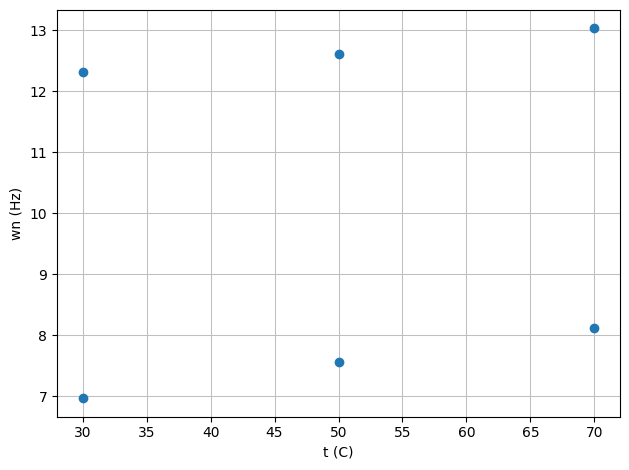

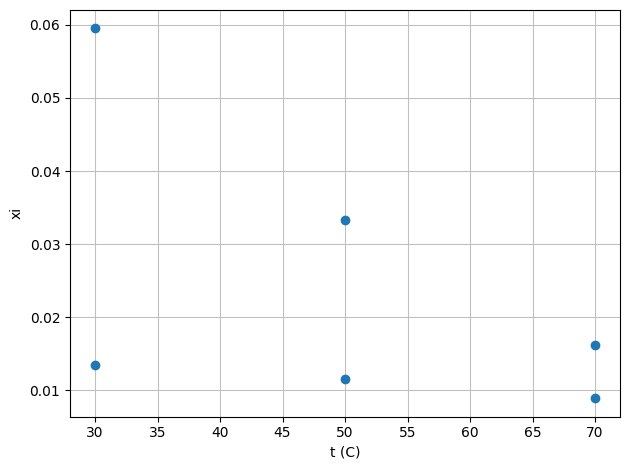

In [84]:
dtuplot.scatter(x, y, ylabel='wn (Hz)', xlabel='t (C)')
dtuplot.scatter(x, y_xi, ylabel='xi', xlabel='t (C)')

5.1

In [85]:
v11, v12, v21, v22 = symbols('v_11 v_12 v_21 v_22')
s1, s2 = symbols('s_1 s_2')
V = Matrix([[v11, v12], [v21, v22]])
S = Matrix([s1, s2])
s_sol = solve(Eq(V*S, f_til), [s1, s2])
s1_iso, s2_iso = list(s_sol.values())
S_sol = Matrix([s1_iso.simplify(), s2_iso.simplify()])
s1_iso, s2_iso, S_sol

⎛                                                                             
⎜                                                                             
⎜     2                          2                         2                  
⎜    ω ⋅u⋅v₂₂⋅sin(φᵤ)         ⅈ⋅ω ⋅u⋅v₂₂⋅cos(φᵤ)          ω ⋅u⋅v₂₁⋅sin(φᵤ)    
⎜─────────────────────── - ───────────────────────, - ─────────────────────── 
⎜l₂⋅v₁₁⋅v₂₂ - l₂⋅v₁₂⋅v₂₁   l₂⋅v₁₁⋅v₂₂ - l₂⋅v₁₂⋅v₂₁    l₂⋅v₁₁⋅v₂₂ - l₂⋅v₁₂⋅v₂₁ 
⎜                                                                             
⎜                                                                             
⎝                                                                             

                           ⎡ 2                             ⎤⎞
                           ⎢ω ⋅u⋅v₂₂⋅(sin(φᵤ) - ⅈ⋅cos(φᵤ)) ⎥⎟
        2                  ⎢────────────────────────────── ⎥⎟
     ⅈ⋅ω ⋅u⋅v₂₁⋅cos(φᵤ)    ⎢    l₂⋅(v₁₁⋅v₂₂ - v₁₂⋅v₂₁)     ⎥⎟
+ ───────────────────────, ⎢            

In [86]:
Am = (K_til - w**2 * M).subs({k3: kk3, k4: kb2, k5: 2*kk})
Am

⎡      2                         2                                            
⎢  Iₜ⋅ω         -g⋅l_g⋅mᵣ + k₁⋅l₁  + k_c                                      
⎢- ───── + k₂ + ────────────────────────                            -k₂       
⎢     2                     2                                                 
⎢   l₂                    l₂                                                  
⎢                                                                             
⎢                                         2⋅F_{0s}⋅(cₛ + 1)                   
⎢                  -k₂                    ───────────────── + k₂ + 2⋅kₛ⋅(ⅈ⋅η +
⎣                                                 hₚ                          

                    ⎤
                    ⎥
                    ⎥
                    ⎥
                    ⎥
                    ⎥
                   2⎥
 1) + k_{b2} - m₂⋅ω ⎥
                    ⎦

In [87]:
z_til = Am.gauss_jordan_solve(f_til)
z_til

⎛⎡                                                                            
⎜⎢                                                                            
⎜⎢────────────────────────────────────────────────────────────────────────────
⎜⎢                2                2                                          
⎜⎢2⋅F_{0s}⋅Iₜ⋅cₛ⋅ω  + 2⋅F_{0s}⋅Iₜ⋅ω  + 2⋅F_{0s}⋅cₛ⋅g⋅l_g⋅mᵣ - 2⋅F_{0s}⋅cₛ⋅k₁⋅l
⎜⎢                                                                            
⎜⎢                                                                            
⎜⎢                                                                            
⎜⎢────────────────────────────────────────────────────────────────────────────
⎜⎢                2                2                                          
⎝⎣2⋅F_{0s}⋅Iₜ⋅cₛ⋅ω  + 2⋅F_{0s}⋅Iₜ⋅ω  + 2⋅F_{0s}⋅cₛ⋅g⋅l_g⋅mᵣ - 2⋅F_{0s}⋅cₛ⋅k₁⋅l

                                                     2                        
                                   - 2⋅F_{0s}⋅cₛ⋅l₂

In [88]:
zp30, zp50, zp70 = z_til[0].subs(mydict).subs(v30), z_til[0].subs(mydict).subs(v50), z_til[0].subs(mydict).subs(v70)

In [89]:
display(zp30, zp50, zp70)

⎡              4                          4                           2       
⎢6.5859408e-8⋅ω ⋅sin(7) - 6.5859408e-8⋅ⅈ⋅ω ⋅cos(7) - 0.0002365645024⋅ω ⋅sin(7)
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                 4                    2      
⎢                                  - 0.000527904⋅ω  + 4.1641655215584⋅ω  + 0.2
⎢                                                                             
⎢                                                                        2    
⎢                                                        - 7.5201168e-5⋅ω ⋅sin
⎢                                  ───────────────────────────────────────────
⎢                                                 4                    2      
⎣                                  - 0.000527904⋅ω  + 4.1641655215584⋅ω  + 0.2

                   2                            2                             
 - 2.558708064e-5⋅ω ⋅cos(7) - 2.558708064e-5⋅ⅈ⋅ω ⋅s

⎡              4                          4                          2        
⎢6.5859408e-8⋅ω ⋅sin(7) - 6.5859408e-8⋅ⅈ⋅ω ⋅cos(7) - 0.000279007232⋅ω ⋅sin(7) 
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                 4                    2      
⎢                                  - 0.000527904⋅ω  + 4.5043703215584⋅ω  + 0.1
⎢                                                                             
⎢                                                                      2      
⎢                                                      - 7.5201168e-5⋅ω ⋅sin(7
⎢                                 ────────────────────────────────────────────
⎢                                                4                    2       
⎣                                 - 0.000527904⋅ω  + 4.5043703215584⋅ω  + 0.15

                  2                            2                            2 
- 1.951960752e-5⋅ω ⋅cos(7) - 1.951960752e-5⋅ⅈ⋅ω ⋅si

⎡              4                          4                           2       
⎢6.5859408e-8⋅ω ⋅sin(7) - 6.5859408e-8⋅ⅈ⋅ω ⋅cos(7) - 0.0003299665328⋅ω ⋅sin(7)
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                 4                    2      
⎢                                  - 0.000527904⋅ω  + 4.9128407215584⋅ω  + 0.1
⎢                                                                             
⎢                                                                        2    
⎢                                                        - 7.5201168e-5⋅ω ⋅sin
⎢                                  ───────────────────────────────────────────
⎢                                                 4                    2      
⎣                                  - 0.000527904⋅ω  + 4.9128407215584⋅ω  + 0.1

                   2                            2                             
 - 1.343812176e-5⋅ω ⋅cos(7) - 1.343812176e-5⋅ⅈ⋅ω ⋅s

In [90]:
Ap = sqrt(re(zp30[0])**2 + im(zp30[0])**2), sqrt(re(zp30[1])**2 + im(zp30[1])**2), sqrt(re(zp50[0])**2 + im(zp50[0])**2), sqrt(re(zp50[1])**2 + im(zp50[1])**2), sqrt(re(zp70[0])**2 + im(zp70[0])**2), sqrt(re(zp70[1])**2 + im(zp70[1])**2)
phip = arg(zp30[0]), arg(zp30[1]), arg(zp50[0]), arg(zp50[1]), arg(zp70[0]), arg(zp70[1])

In [91]:
plotty = [[Matrix([[Ap[2*i] * cos(w*t + phip[2*i])], [Ap[2*i+1] * cos(w*t + phip[2*i+1])]]).subs(w, w_).evalf() for w_ in [6,7,8,9]] for i in range(3)]
plotty

⎡⎡⎡                       ⎛          ⎛-1.39137354245318⋅cos(7) - 0.05505100261
⎢⎢⎢1.43490263448056e-6⋅cos⎜6⋅t + atan⎜────────────────────────────────────────
⎢⎢⎢                       ⎝          ⎝-0.0550510026129719⋅cos(7) + 1.391373542
⎢⎢⎢                                                                           
⎢⎢⎢                        ⎛          ⎛-5845.66476353942⋅cos(7) - 873.74091357
⎢⎢⎢ 4.58031500729623e-7⋅cos⎜6⋅t + atan⎜───────────────────────────────────────
⎣⎣⎣                        ⎝          ⎝-873.740913579072⋅cos(7) + 5845.6647635

29719⋅sin(7)⎞⎞⎤  ⎡                       ⎛          ⎛-1.37380501642786⋅cos(7) 
────────────⎟⎟⎥  ⎢1.96373258906908e-6⋅cos⎜7⋅t + atan⎜─────────────────────────
45318⋅sin(7)⎠⎠⎥  ⎢                       ⎝          ⎝-0.0550510026129719⋅cos(7
              ⎥, ⎢                                                            
9072⋅sin(7)⎞⎞ ⎥  ⎢                        ⎛          ⎛-5792.11394567916⋅cos(7)
───────────⎟⎟ ⎥  ⎢ 6.29110664956775e-7⋅cos⎜7⋅t + at

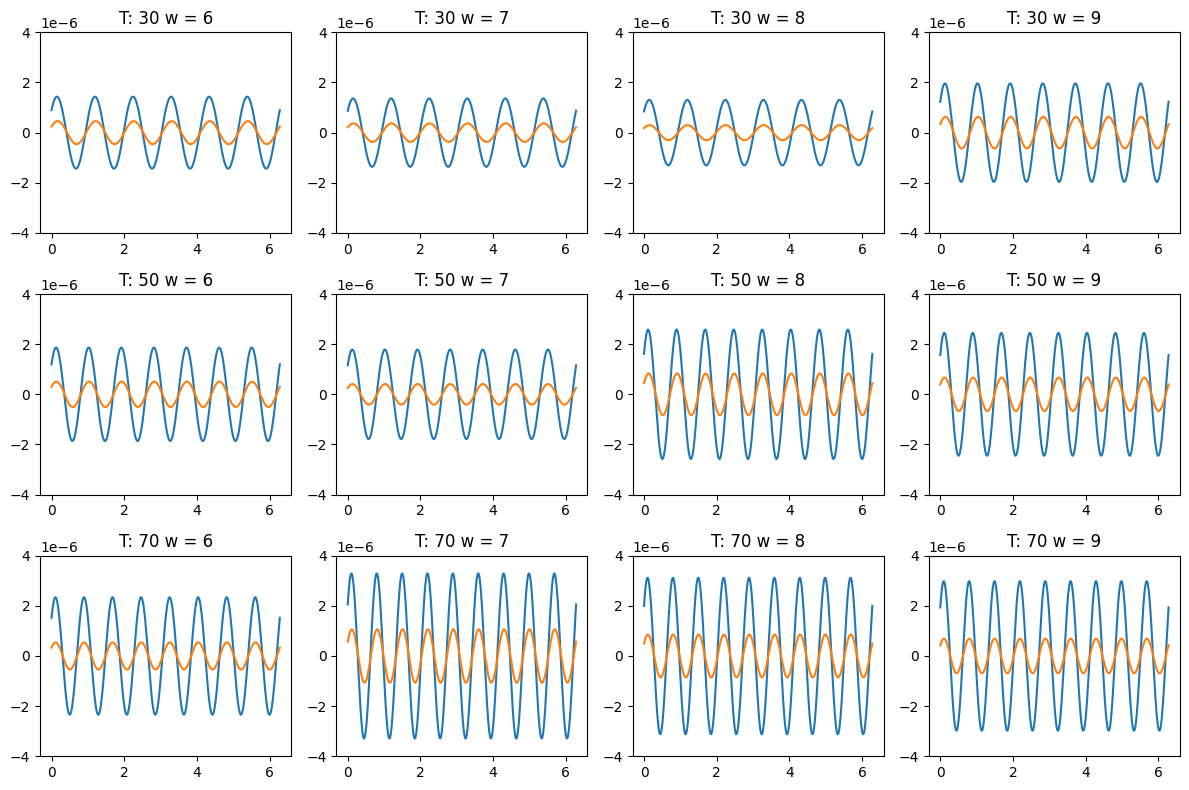

In [92]:
arr_plot = [(plotty[n][w_][0], plotty[n][w_][1]) for w_ in range(4) for n in range(3)]

import matplotlib.pyplot as plt
import numpy as np

t_ = np.linspace(0, 2*np.pi, 1000)
arr_np = lambdify(t, arr_plot, 'numpy')

# make a 3x4 grid of subplots
fig, ax = plt.subplots(3, 4, figsize=(12, 8))
deg = [30, 50, 70]

# loop over the subplots
for i in range(3):
    for j in range(4):
        # plot the data
        ax[i, j].plot(t_, arr_np(t_)[i*4+j][0], t_, arr_np(t_)[i*4+j][1])
        ax[i, j].set_ylim(-4*10**(-6), 4*10**(-6))
        ax[i, j].set_title(f'T: {str(deg[i])} w = {str(6+j)}')
        
plt.tight_layout()

In [93]:
z1_abs = sqrt(re(z_til[0][0])**2 + im(z_til[0][0])**2)
z2_abs = sqrt(re(z_til[0][1])**2 + im(z_til[0][1])**2)


In [94]:
yp1 = z1_abs * cos(w*t + arg(z_til[0][0]))
yp2 = z2_abs * cos(w*t + arg(z_til[0][1]))

In [95]:
plotty2 = [[Matrix([[yp1.subs(mydict).subs(temp)], [yp2.subs(mydict).subs(temp)]]).subs(w, w_).evalf(30) for w_ in [6,7,8,9]] for temp in [v30, v50, v70]]
plotty2

⎡⎡⎡                                         ⎛          ⎛-357459.033617608⋅cos(
⎢⎢⎢0.00000143490263448056255466368021196⋅cos⎜6⋅t + atan⎜──────────────────────
⎢⎢⎢                                         ⎝          ⎝-14143.2028087997⋅cos(
⎢⎢⎢                                                                           
⎢⎢⎢                                          ⎛          ⎛-5845.66476353942⋅cos
⎢⎢⎢0.000000458031500729622744487280895953⋅cos⎜6⋅t + atan⎜─────────────────────
⎣⎣⎣                                          ⎝          ⎝-873.740913579072⋅cos

7) - 14143.2028087997⋅sin(7)⎞⎞ ⎤  ⎡                                         ⎛ 
────────────────────────────⎟⎟ ⎥  ⎢0.00000196373258906907703569017265741⋅cos⎜7
7) + 357459.033617608⋅sin(7)⎠⎠ ⎥  ⎢                                         ⎝ 
                               ⎥, ⎢                                           
(7) - 873.740913579072⋅sin(7)⎞⎞⎥  ⎢                                          ⎛
─────────────────────────────⎟⎟⎥  ⎢0.00000062911066

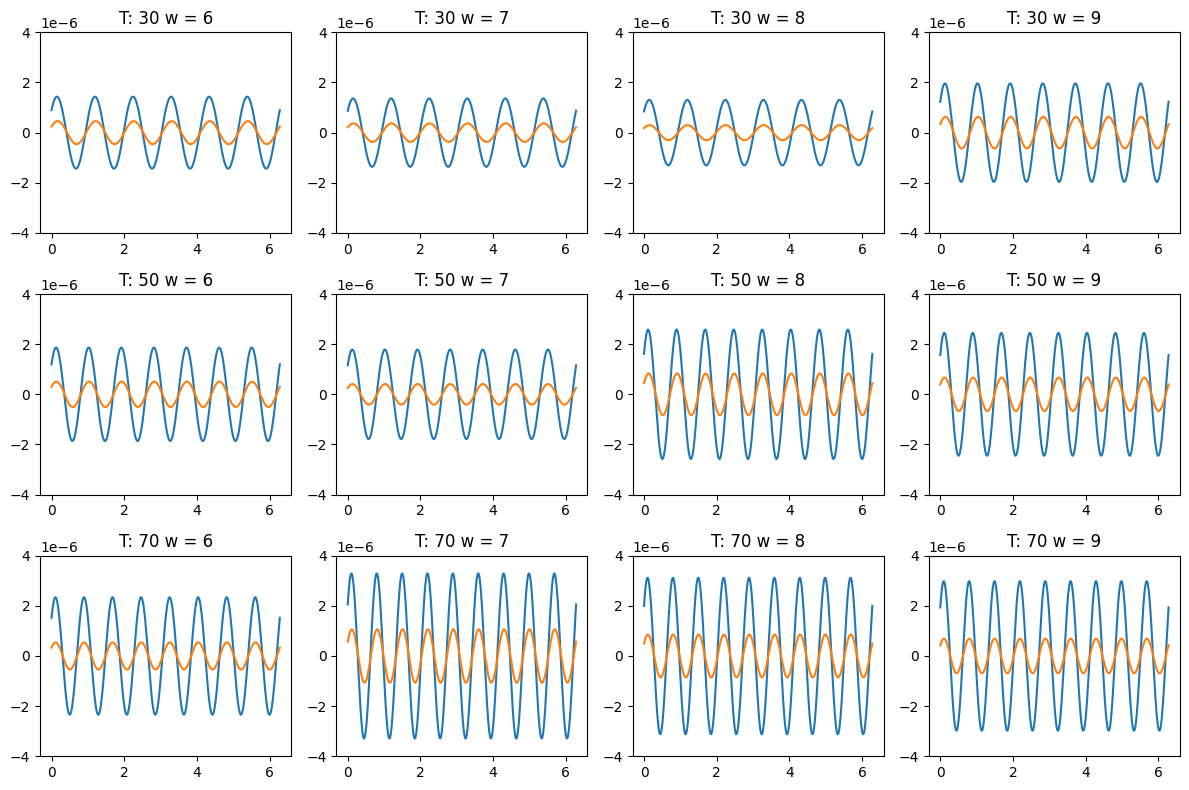

In [96]:
arr_plot2 = [(plotty2[n][w_][0], plotty2[n][w_][1]) for w_ in range(4) for n in range(3)]

import matplotlib.pyplot as plt
import numpy as np

t_ = np.linspace(0, 2*np.pi, 1000)
arr_np2 = lambdify(t, arr_plot2, 'numpy')

# make a 3x4 grid of subplots
fig, ax = plt.subplots(3, 4, figsize=(12, 8))
deg = [30, 50, 70]

# loop over the subplots
for i in range(3):
    for j in range(4):
        # plot the data
        ax[i, j].plot(t_, arr_np2(t_)[i*4+j][0], t_, arr_np2(t_)[i*4+j][1])
        ax[i, j].set_ylim(-4*10**(-6), 4*10**(-6))
        ax[i, j].set_title(f'T: {str(deg[i])} w = {str(6+j)}')
        
plt.tight_layout()